In [2]:
# %% [markdown]
"""
# Credit Risk EDA Notebook
**Task 2 - Exploratory Data Analysis**

This notebook explores the raw dataset to understand patterns, data quality issues, and form hypotheses for feature engineering.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the data
data_path = "../data/raw/data.csv"
df = pd.read_csv(data_path)
# Initial inspection
print("=== Dataset Shape ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("=== First 5 Rows ===")
display(df.head())

print("\n=== Data Types ===")
print(df.dtypes)

=== Dataset Shape ===
Rows: 95662, Columns: 16

=== First 5 Rows ===


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



=== Data Types ===
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [3]:
## 2. Summary Statistics
# %%
print("=== Numerical Features Summary ===")
display(df.describe())

print("\n=== Categorical Features Summary ===")
cat_cols = df.select_dtypes(include=['object']).columns
display(df[cat_cols].describe())

=== Numerical Features Summary ===


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



=== Categorical Features Summary ===


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


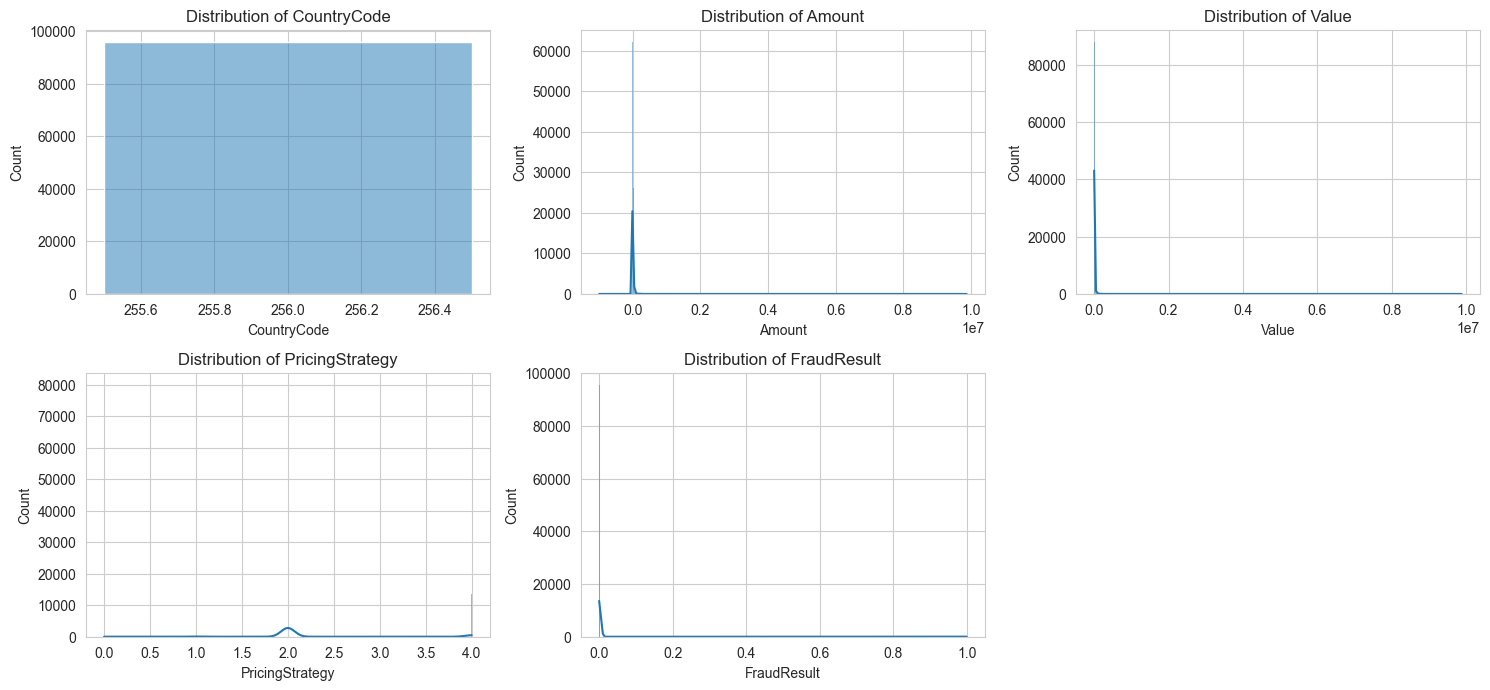


=== Skewness Analysis ===


Value              51.291086
Amount             51.098490
FraudResult        22.196295
PricingStrategy     1.659057
CountryCode         0.000000
dtype: float64

In [4]:
## 3. Distribution of Numerical Features
# %%
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Skewness analysis
print("\n=== Skewness Analysis ===")
skewness = df[num_cols].skew().sort_values(ascending=False)
display(skewness)



=== Categorical Features ===

--- TransactionId ---
Unique values: 95662
Top categories:


TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64

Skipping plot - too many categories (95662)


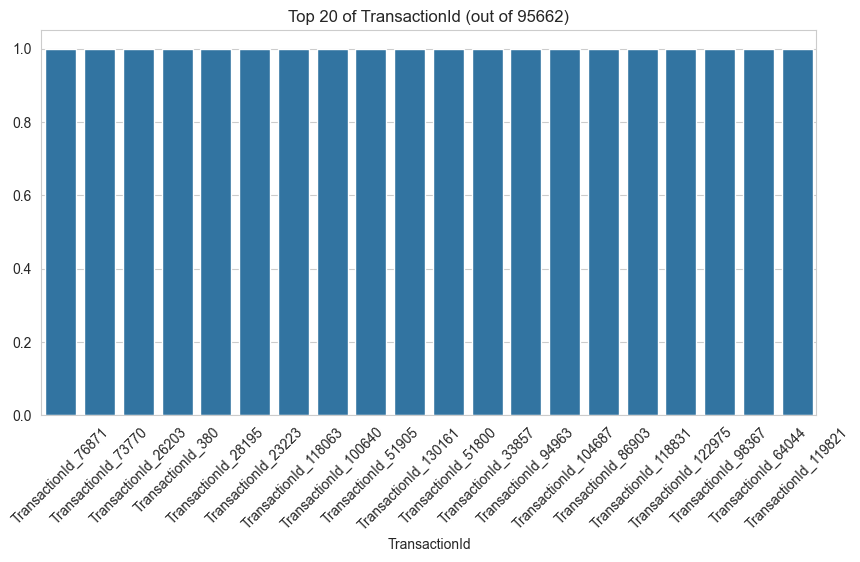


--- BatchId ---
Unique values: 94809
Top categories:


BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_86880      6
BatchId_22960      6
Name: count, dtype: int64

Skipping plot - too many categories (94809)


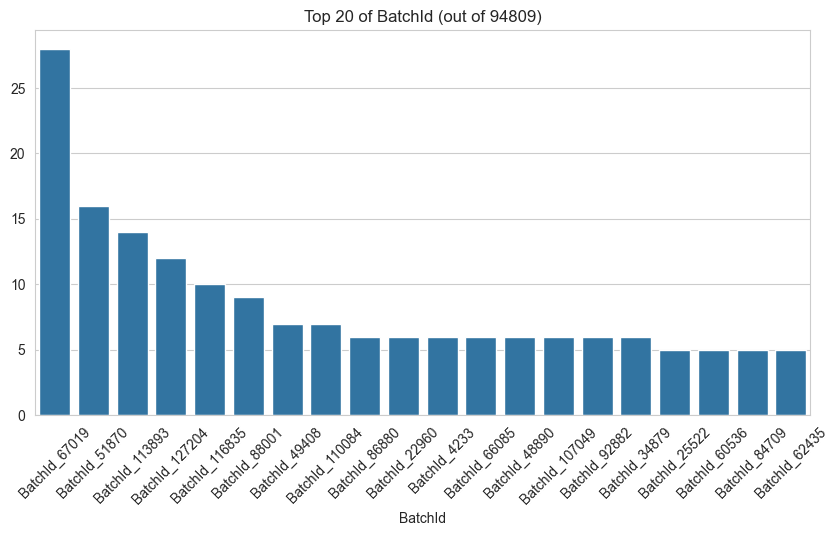


--- AccountId ---
Unique values: 3633
Top categories:


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

Skipping plot - too many categories (3633)


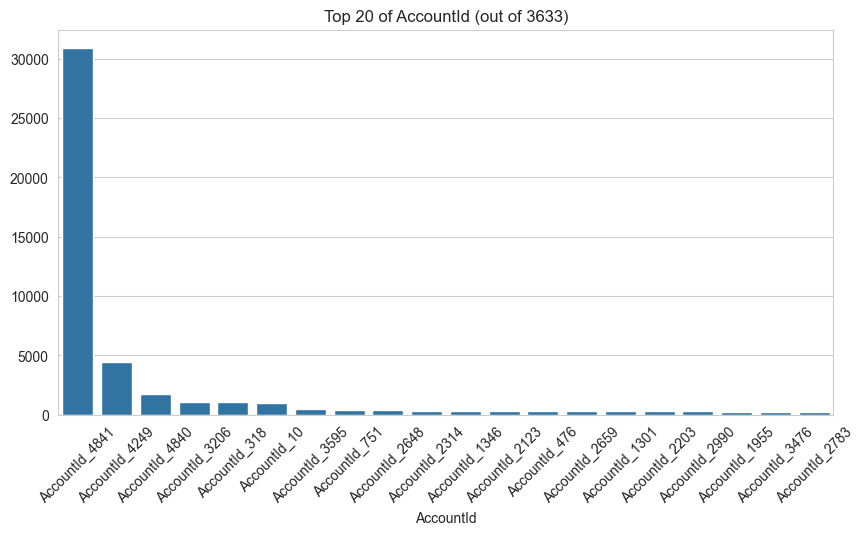


--- SubscriptionId ---
Unique values: 3627
Top categories:


SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
SubscriptionId_1749      465
SubscriptionId_919       411
SubscriptionId_1311      359
SubscriptionId_4722      356
SubscriptionId_652       350
Name: count, dtype: int64

Skipping plot - too many categories (3627)


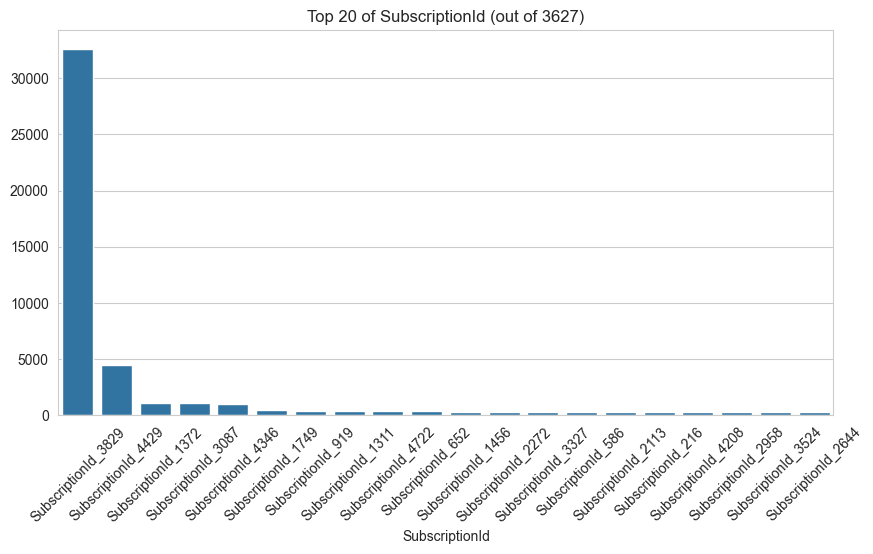


--- CustomerId ---
Unique values: 3742
Top categories:


CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
CustomerId_3066     612
CustomerId_2528     610
CustomerId_2728     586
CustomerId_3078     573
CustomerId_806      557
Name: count, dtype: int64

Skipping plot - too many categories (3742)


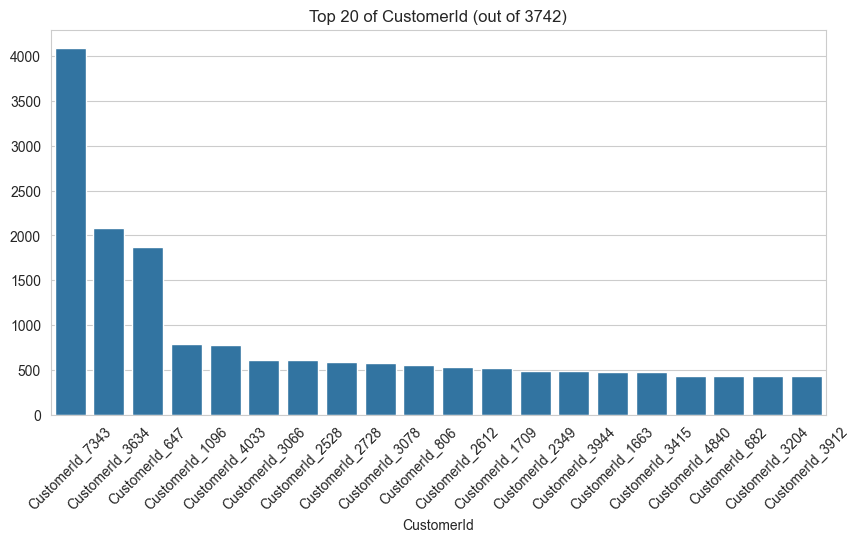


--- CurrencyCode ---
Unique values: 1
Top categories:


CurrencyCode
UGX    95662
Name: count, dtype: int64

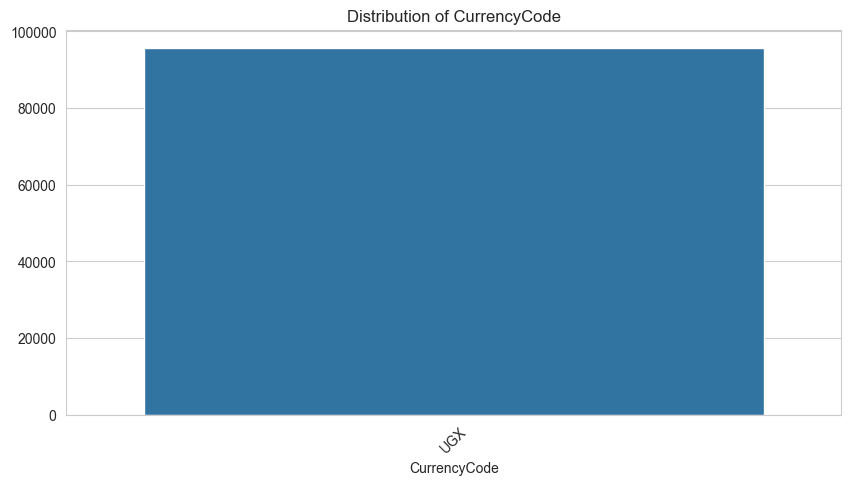


--- ProviderId ---
Unique values: 6
Top categories:


ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64

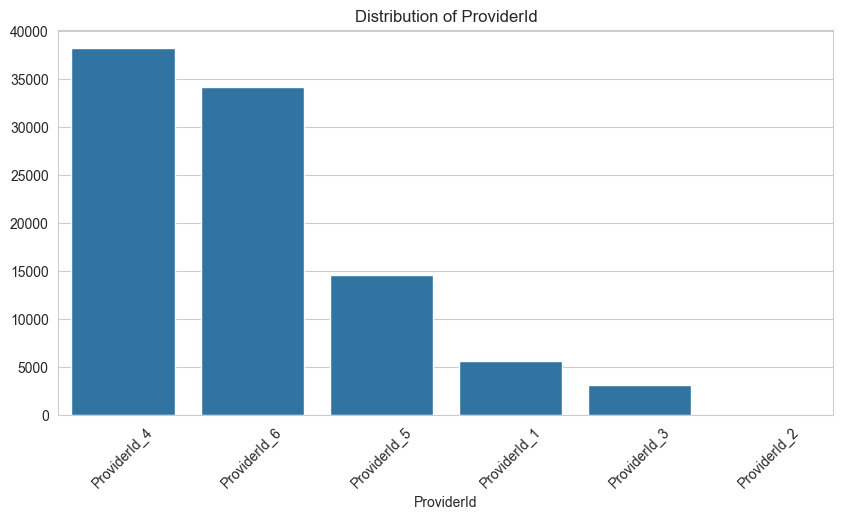


--- ProductId ---
Unique values: 23
Top categories:


ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
Name: count, dtype: int64

Skipping plot - too many categories (23)


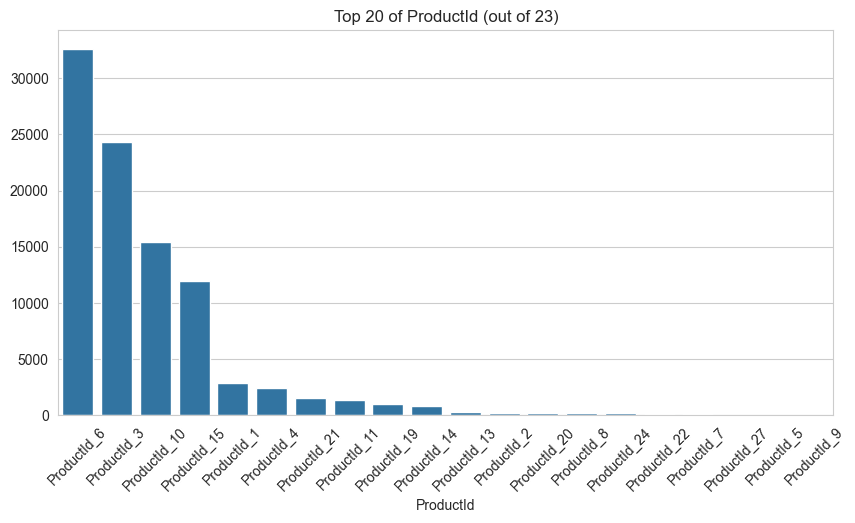


--- ProductCategory ---
Unique values: 9
Top categories:


ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

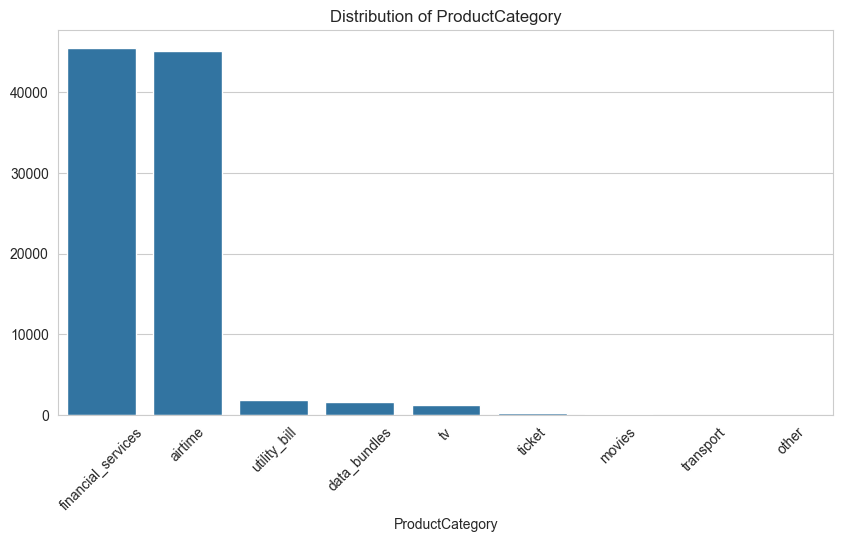


--- ChannelId ---
Unique values: 4
Top categories:


ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64

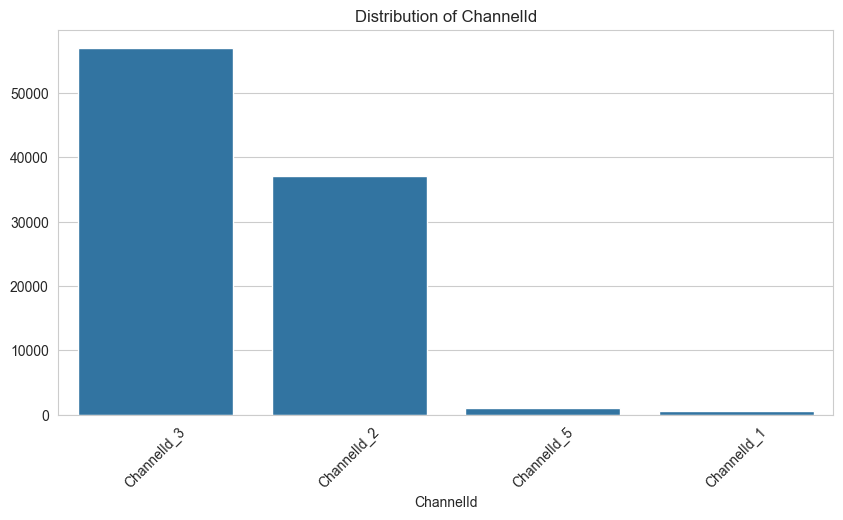


--- TransactionStartTime ---
Unique values: 94556
Top categories:


TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
2018-12-07T13:09:47Z     4
2018-12-24T16:30:11Z     4
2018-12-07T11:54:01Z     4
2019-01-04T04:29:41Z     4
2019-01-14T17:24:54Z     4
Name: count, dtype: int64

Skipping plot - too many categories (94556)


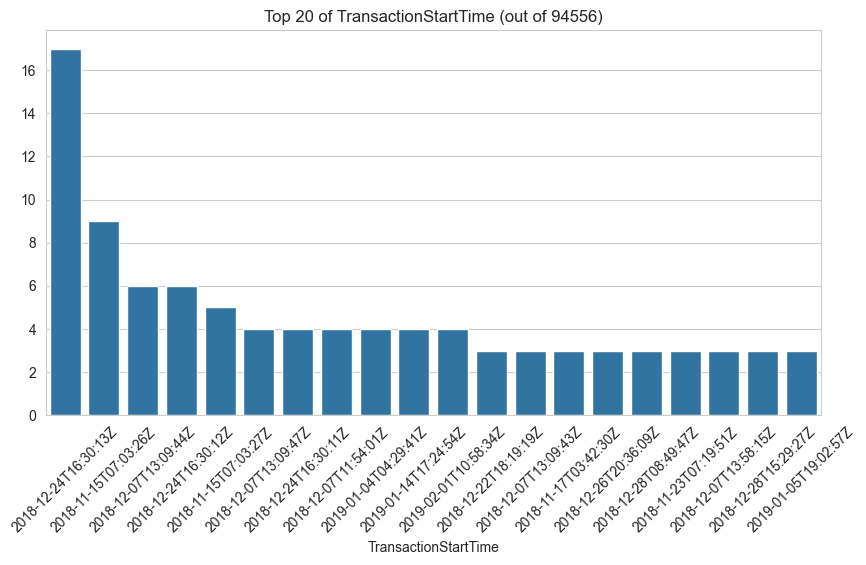

In [6]:
# %% [markdown]
## 4. Distribution of Categorical Features (Optimized)
# %%
if len(cat_cols) > 0:
    print("\n=== Categorical Features ===")
    
    # Limit to top N categories for better visualization
    TOP_CATEGORIES = 20  
    
    for col in cat_cols:
        print(f"\n--- {col} ---")
        
        # Get value counts (faster than plotting all)
        value_counts = df[col].value_counts(dropna=False)
        
        # Print summary stats
        print(f"Unique values: {len(value_counts)}")
        print("Top categories:")
        display(value_counts.head(10))
        
        # Only plot if reasonable number of categories
        if len(value_counts) <= TOP_CATEGORIES:
            plt.figure(figsize=(10, 5))
            sns.barplot(x=value_counts.index, 
                        y=value_counts.values)
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Skipping plot - too many categories ({len(value_counts)})")
            # Plot top N categories instead
            plt.figure(figsize=(10, 5))
            sns.barplot(x=value_counts.head(TOP_CATEGORIES).index,
                        y=value_counts.head(TOP_CATEGORIES).values)
            plt.title(f'Top {TOP_CATEGORIES} of {col} (out of {len(value_counts)})')
            plt.xticks(rotation=45)
            plt.show()
else:
    print("No categorical features found in the dataset.")

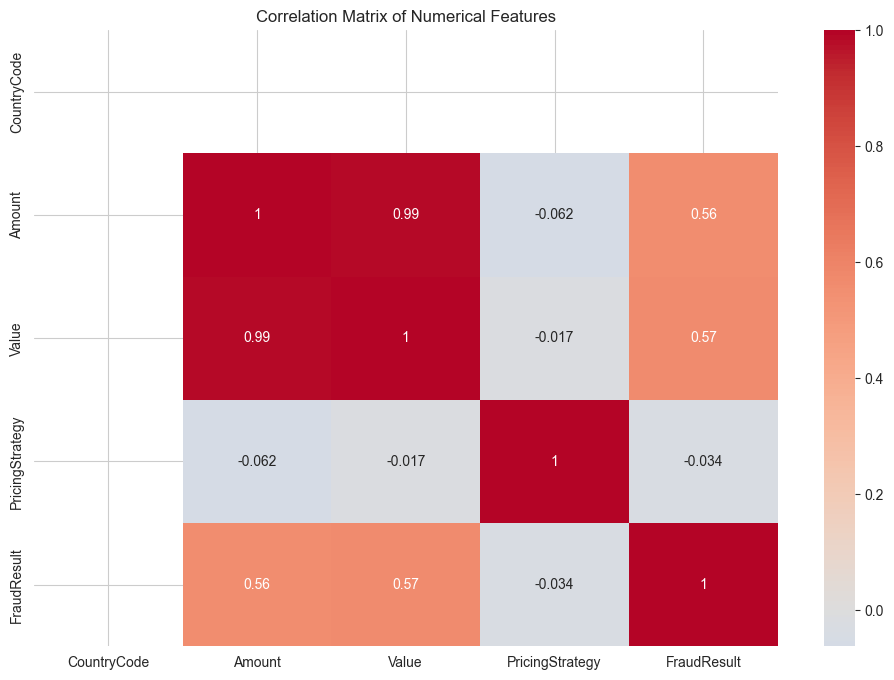


=== Top Feature Correlations ===


Value            Amount             0.989692
Amount           Value              0.989692
Value            FraudResult        0.566739
FraudResult      Value              0.566739
Amount           FraudResult        0.557370
FraudResult      Amount             0.557370
PricingStrategy  Value             -0.017020
Value            PricingStrategy   -0.017020
FraudResult      PricingStrategy   -0.033821
PricingStrategy  FraudResult       -0.033821
dtype: float64

In [7]:
## 5. Correlation Analysis
# %%
# Calculate correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Top correlations
print("\n=== Top Feature Correlations ===")
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
display(corr_pairs[corr_pairs != 1].head(10))

In [8]:
## 6. Missing Values Analysis
# %%
# Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0]

print("=== Missing Values Summary ===")
if len(missing_df) > 0:
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("No missing values found in the dataset.")

=== Missing Values Summary ===
No missing values found in the dataset.


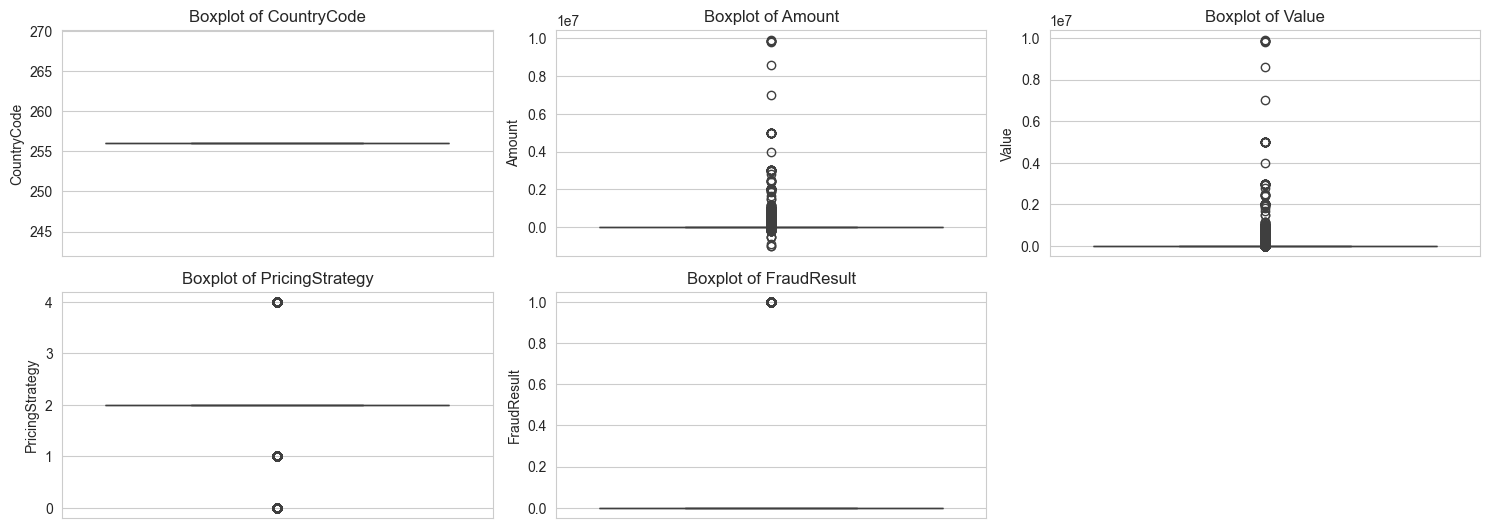


=== Outlier Summary ===


,Feature,Outlier Count,Percentage (%)
0,CountryCode,0,0.000000
1,Amount,24441,25.549330
2,Value,9021,9.430077
3,PricingStrategy,15814,16.531120
4,FraudResult,193,0.201752


In [9]:
## 7. Outlier Detection
# %%
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

# IQR method for outlier detection
print("\n=== Outlier Summary ===")
outlier_summary = []
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary.append({
        'Feature': col,
        'Outlier Count': len(outliers),
        'Percentage (%)': (len(outliers)/len(df))*100
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)